In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.shape

(1338, 7)

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.isnull().mean()*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [7]:
data.duplicated().sum()

1

In [8]:
data.drop_duplicates(inplace= True)

In [9]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### <I> UNIVARIATE DATASET

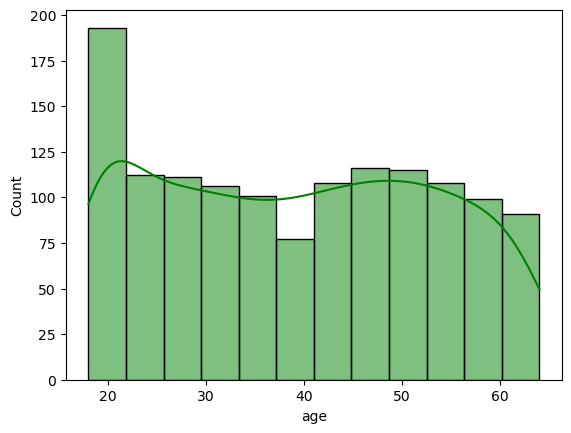

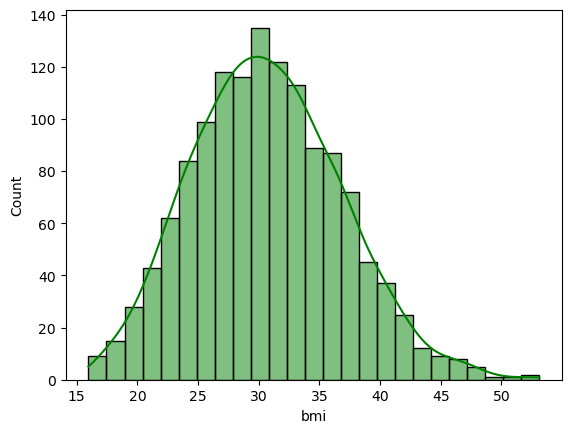

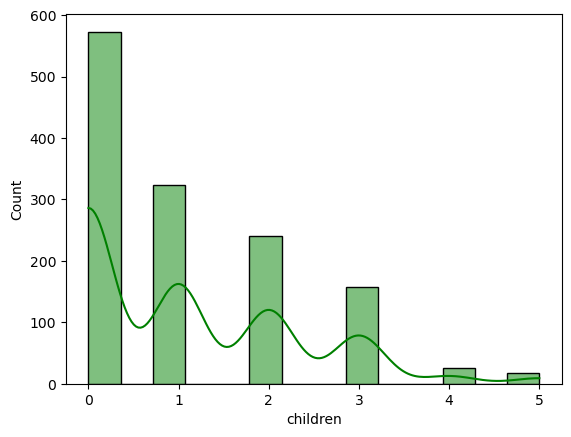

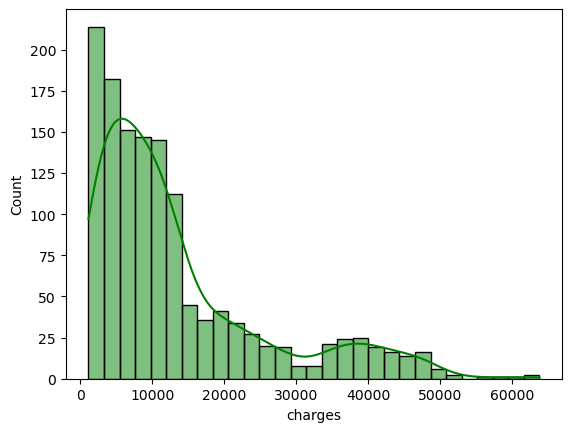

In [10]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.histplot(data = data[i],kde = True,color= 'green')
        plt.show()

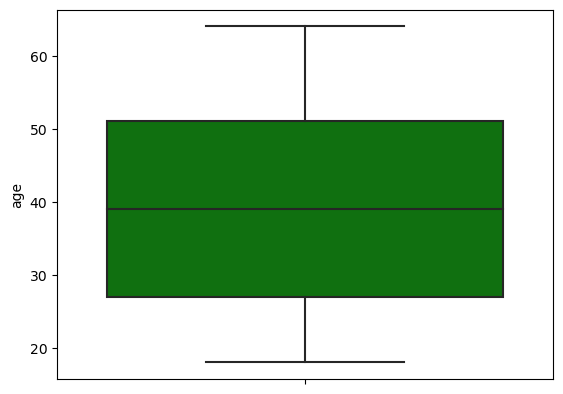

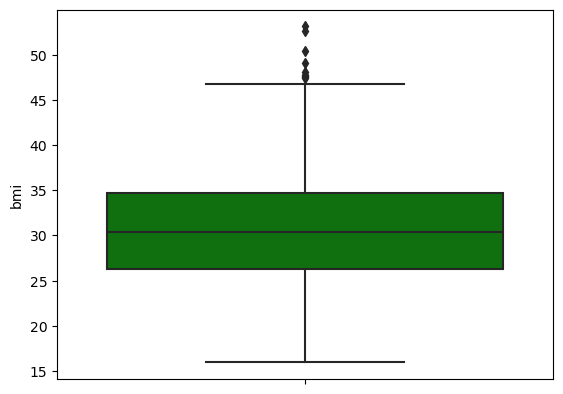

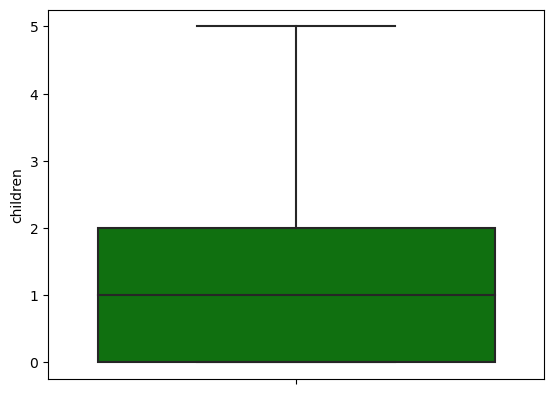

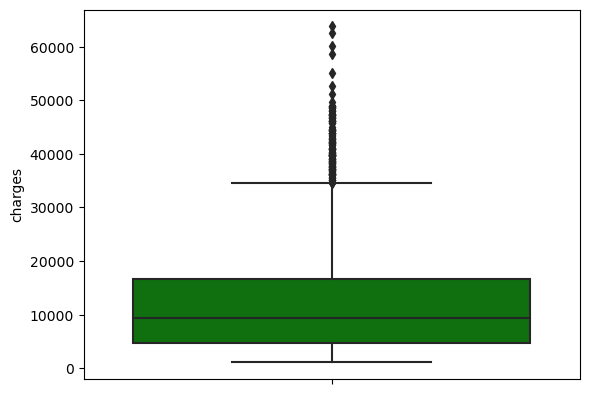

In [11]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.boxplot(y = data[i],color= 'green')
        plt.show()

### <i> Outlier treatment on bmi and Charges

In [12]:
b_list = ['bmi','charges']

In [54]:
def outlier_limit(b_list):
    Q3,Q1=np.nanpercentile(b_list,[75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [55]:
for i in b_list:
    UL,LL = outlier_limit(data[i])
    data[i] = np.where((data[i]>UL) | (data[i]<LL),np.nan, data[i])

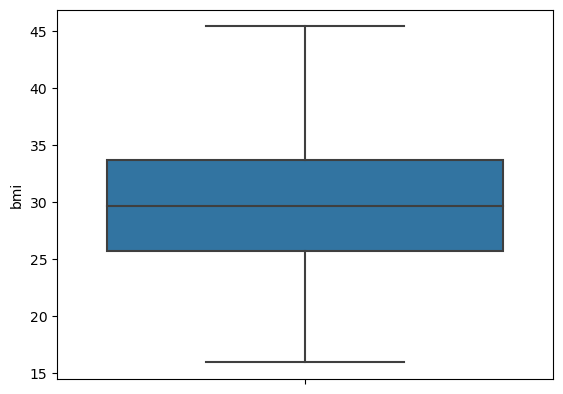

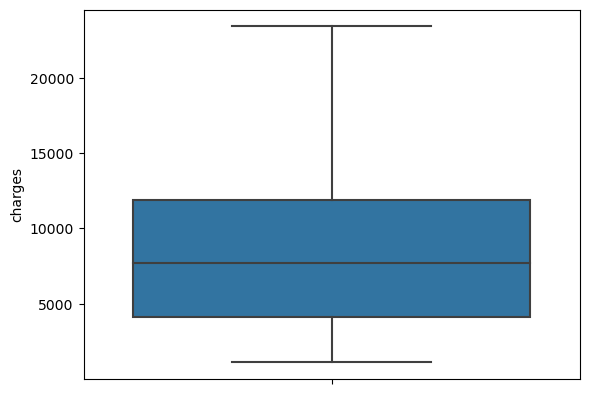

In [56]:
for i in b_list:
    sns.boxplot(y = data[i])
    plt.show()

In [57]:
data.dropna(inplace=True)

### <i>Multivariant Analysis

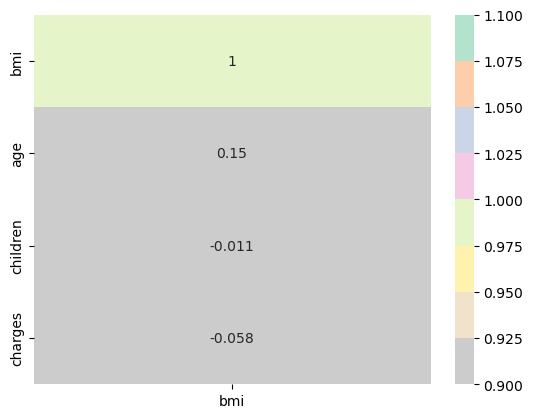

In [58]:
sns.heatmap(data.corr()[['bmi']].sort_values(by= 'bmi',ascending = False),vmax= 1,vmin = 1,annot = True,cmap= 'Pastel2_r')
plt.show()

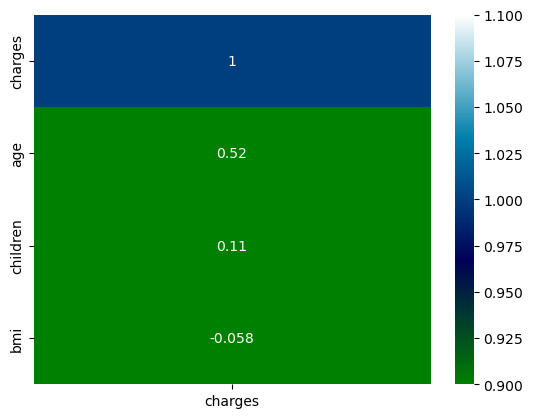

In [59]:
sns.heatmap(data.corr()[['charges']].sort_values(by= 'charges',ascending = False),vmax= 1,vmin = 1,annot = True,cmap= 'ocean')
plt.show()

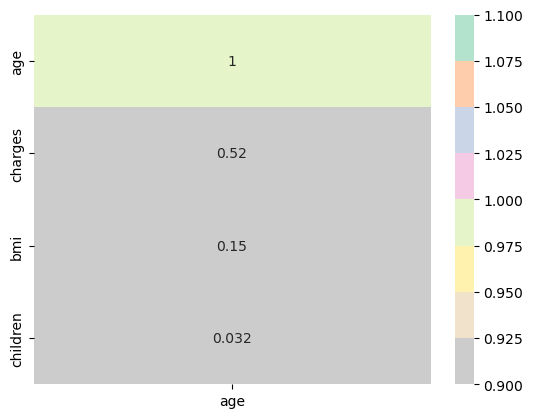

In [60]:
sns.heatmap(data.corr()[['age']].sort_values(by= 'age',ascending = False),vmax= 1,vmin = 1,annot = True,cmap= 'Pastel2_r')
plt.show()

### <i>Reorder dataframe columns using reindex

In [61]:
df = data.reindex(columns=['sex', 'children', 'smoker', 'region','bmi', 'age', 'charges'])
df

,sex,children,smoker,region,bmi,age,charges
0,female,0,yes,southwest,27.900,19,16884.92400
1,male,1,no,southeast,33.770,18,1725.55230
2,male,3,no,southeast,33.000,28,4449.46200
3,male,0,no,northwest,22.705,33,21984.47061
4,male,0,no,northwest,28.880,32,3866.85520
...,...,...,...,...,...,...,...
1332,female,3,no,southwest,44.700,52,11411.68500
1333,male,3,no,northwest,30.970,50,10600.54830
1334,female,0,no,northeast,31.920,18,2205.98080
1335,female,0,no,southeast,36.850,18,1629.83350


### <i> Selecting Target

In [62]:
x = df.iloc[:,4:-1].values
x

array([[27.9 , 19.  ],
       [33.77, 18.  ],
       [33.  , 28.  ],
       ...,
       [31.92, 18.  ],
       [36.85, 18.  ],
       [25.8 , 21.  ]])

In [63]:
y = df.iloc[:,-1].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  2205.9808,  1629.8335,
        2007.945 ])

### <i>Intialising standard scaler

In [64]:
sc = StandardScaler()

In [65]:
sc_fit = sc.fit_transform(x)
sc_fit

array([[-0.35242021, -1.40361718],
       [ 0.65597516, -1.47573178],
       [ 0.52369842, -0.75458575],
       ...,
       [ 0.33816742, -1.47573178],
       [ 1.1850821 , -1.47573178],
       [-0.71317494, -1.25938797]])

### <i><u>Spliting data into training and testing

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle= True)

In [67]:
x_test.shape

(221, 2)

### <i> Model Building

In [68]:
models = {
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'LinearSVR':LinearSVR(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'AdaBoostingRegressor':AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor(random_state = 0)
}

In [69]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print("Model Training with {}".format(name))
    trainingscore = model.score(x_train,y_train)*100
    testigscore   = model.score(x_test,y_test)*100
    score         = r2_score(y_test,model.predict(x_test))*100
    mae           = mean_absolute_error(y_test,model.predict(x_test))
    mse           = mean_squared_error(y_test,model.predict(x_test))
    rsme          = np.sqrt(mse)
    print('r2_score',score)
    print('trainingscore',trainingscore)
    print('testigscore',testigscore)
    print('score',score)
    print('mean_absolute_error',mae)
    print('mean_squared_error',mse)
    print('rsme',rsme)
    print("*" *100)

Model Training with LinearRegression
r2_score 32.38492284261278
trainingscore 27.794578838156482
testigscore 32.38492284261278
score 32.38492284261278
mean_absolute_error 2862.934797265097
mean_squared_error 17464329.57064932
rsme 4179.034526137505
****************************************************************************************************
Model Training with Ridge
r2_score 32.3848771321096
trainingscore 27.794578835050277
testigscore 32.3848771321096
score 32.3848771321096
mean_absolute_error 2862.9353874638755
mean_squared_error 17464341.377236344
rsme 4179.035938734715
****************************************************************************************************
Model Training with Lasso
r2_score 32.38455742836746
trainingscore 27.794578711894758
testigscore 32.38455742836746
score 32.38455742836746
mean_absolute_error 2862.9313851590755
mean_squared_error 17464423.953663856
rsme 4179.04581856479
*************************************************************************

###  Regression based on Age and charge

### <i> Selecting Target 

In [70]:
x = df.iloc[:,5:-1].values
x

array([[19],
       [18],
       [28],
       ...,
       [18],
       [18],
       [21]], dtype=int64)

In [71]:
y = df.iloc[:,-1].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  2205.9808,  1629.8335,
        2007.945 ])

In [72]:
sc = StandardScaler()

In [73]:
sc_fit = sc.fit_transform(x)
sc_fit

array([[-1.40361718],
       [-1.47573178],
       [-0.75458575],
       ...,
       [-1.47573178],
       [-1.47573178],
       [-1.25938797]])

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle= True)

In [75]:
x_test.shape

(221, 1)

In [76]:
LR_model = LinearRegression() ## model building  

In [77]:
LR_model.fit(x_train,y_train)

LinearRegression()

In [78]:
y_pred = LR_model.predict(x_test)

In [79]:
y_pred

array([ 6274.58523197,  6480.39121461,  4628.13737086,  4628.13737086,
        9979.09291948, 10596.5108674 ,  4422.33138822, 10390.70488476,
       11213.92881531, 11419.73479795,  4422.33138822, 12037.15274587,
        5862.97326669,  5039.74933614, 13889.40658962,  6686.19719725,
        4628.13737086, 13889.40658962,  4422.33138822,  7921.03309309,
       13477.79462434,  4628.13737086,  8538.451041  ,  9979.09291948,
       11831.34676323,  6686.19719725, 11625.54078059,  7097.80916253,
        5039.74933614, 10596.5108674 , 11831.34676323,  6274.58523197,
       10390.70488476, 12242.95872851, 11831.34676323, 13477.79462434,
        6480.39121461,  5039.74933614,  7715.22711045, 12654.57069379,
        4628.13737086,  8538.451041  , 12242.95872851, 10596.5108674 ,
        7509.42112781, 10802.31685003,  4833.9433535 ,  7509.42112781,
        6480.39121461,  5451.36130141,  8950.06300628,  7303.61514517,
        8744.25702364,  8950.06300628,  4422.33138822, 11625.54078059,
      

In [82]:
r2_score(y_test,y_pred)

0.290254770975064

In [80]:
LR_model.score(x_train,y_train)

0.2625333540179483

In [81]:
LR_model.score(x_test,y_test)

0.290254770975064

In [83]:
mean_absolute_error(y_test,y_pred)

2893.234072404624

In [84]:
mean_squared_error(y_test,y_pred)

18332042.366875026

In [85]:
out = pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Prediction'])
out

,Actual,Prediction
0,15006.57945,6274.585232
1,3277.16100,6480.391215
2,1632.03625,4628.137371
3,17468.98390,4628.137371
4,8605.36150,9979.092919
...,...,...
216,2304.00220,4422.331388
217,9411.00500,10184.898902
218,13725.47184,9155.868989
219,14254.60820,13683.600607


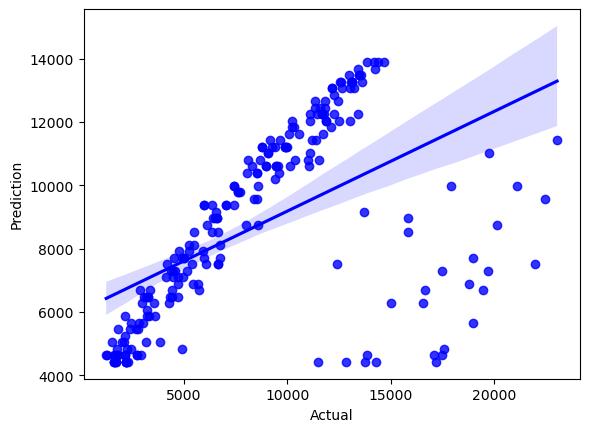

In [87]:
sns.regplot(data=out,x = 'Actual',y = 'Prediction',color='blue')
plt.show()